In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
import requests
from datetime import datetime

# Список городов
cities = ["Moscow", "Tokyo", "London", "Paris", "New York", "Los Angeles", "Chicago", "Houston"]

# Функция для получения данных о погоде
def get_weather_data(city, date):
    api_key = "071839bb68634f109d3175553241411"  
    url = f"http://api.weatherapi.com/v1/history.json"
    
    # Форматирование даты
    date_str = date.strftime('%Y-%m-%d')
    
    # Формирование URL с параметрами
    url = f"{url}?key={api_key}&q={city}&dt={date_str}"
    
    # Отправка запроса
    response = requests.get(url)
    
    # Обработка ответа
    if response.status_code == 200:
        data = response.json()
        if 'forecast' in data and 'forecastday' in data['forecast']:
            temp = data["forecast"]["forecastday"][0]["day"]["avgtemp_c"]  # Получение средней температуры
            return temp
        else:
            print(f"Нет данных о погоде для {city} на {date_str}")
            return None
    else:
        print(f"Ошибка получения данных для {city} на {date_str}: {response.status_code} - {response.text}")
        return None


In [12]:
# Установка даты для запроса (например, сегодняшняя дата)
date = datetime.now()

# Словарь для хранения результатов
weather_results = {}

# Цикл по городам
for city in cities:
    temp = get_weather_data(city, date)
    if temp is not None:
        weather_results[city] = temp

# Вывод результатов
for city, temp in weather_results.items():
    print(f"Средняя температура в {city} на {date.strftime('%Y-%m-%d')}: {temp}°C")


Средняя температура в Moscow на 2024-11-14: 0.2°C
Средняя температура в Tokyo на 2024-11-14: 17.0°C
Средняя температура в London на 2024-11-14: 9.5°C
Средняя температура в Paris на 2024-11-14: 8.3°C
Средняя температура в New York на 2024-11-14: 5.3°C
Средняя температура в Los Angeles на 2024-11-14: 15.7°C
Средняя температура в Chicago на 2024-11-14: 9.8°C
Средняя температура в Houston на 2024-11-14: 20.9°C


In [1]:
import requests
from datetime import datetime, timedelta

# Список городов
cities = ["Moscow", "Tokyo", "London", "Paris", "New York", "Los Angeles", "Chicago", "Houston"]

# Функция для получения данных о погоде
def get_weather_data(city, date):
    api_key = "071839bb68634f109d3175553241411"  
    url = f"http://api.weatherapi.com/v1/history.json"
    
    # Форматирование даты
    date_str = date.strftime('%Y-%m-%d')
    
    # Формирование URL с параметрами
    url = f"{url}?key={api_key}&q={city}&dt={date_str}"
    
    # Отправка запроса
    response = requests.get(url)
    
    # Обработка ответа
    if response.status_code == 200:
        data = response.json()
        if 'forecast' in data and 'forecastday' in data['forecast']:
            temp = data["forecast"]["forecastday"][0]["day"]["avgtemp_c"]  # Получение средней температуры
            return temp
        else:
            print(f"Нет данных о погоде для {city} на {date_str}")
            return None
    else:
        print(f"Ошибка получения данных для {city} на {date_str}: {response.status_code} - {response.text}")
        return None

# Получение данных за месяц
def get_monthly_weather_data(city, start_date, days=30):
    temperatures = {}
    for i in range(days):
        date = start_date - timedelta(days=i)
        temp = get_weather_data(city, date)
        if temp is not None:
            temperatures[date.strftime('%Y-%m-%d')] = temp
    return temperatures

# Пример использования
if __name__ == "__main__":
    start_date = datetime.now()  # Текущая дата
    for city in cities:
        monthly_data = get_monthly_weather_data(city, start_date)
        print(f"Температуры для {city}: {monthly_data}")


Температуры для Moscow: {'2024-11-14': 0.2, '2024-11-13': 1.1, '2024-11-12': 1.1, '2024-11-11': 0.3, '2024-11-10': 3.8, '2024-11-09': 5.4, '2024-11-08': 3.7, '2024-11-07': 3.0, '2024-11-06': 0.3, '2024-11-05': -1.6, '2024-11-04': -0.3, '2024-11-03': 0.1, '2024-11-02': 2.8, '2024-11-01': 3.9, '2024-10-31': 4.4, '2024-10-30': 5.0, '2024-10-29': 6.2, '2024-10-28': 8.3, '2024-10-27': 4.6, '2024-10-26': 5.1, '2024-10-25': 6.1, '2024-10-24': 7.4, '2024-10-23': 9.7, '2024-10-22': 9.4, '2024-10-21': 8.6, '2024-10-20': 6.6, '2024-10-19': 5.3, '2024-10-18': 4.5, '2024-10-17': 4.4, '2024-10-16': 6.5}
Температуры для Tokyo: {'2024-11-14': 17.0, '2024-11-13': 17.3, '2024-11-12': 17.0, '2024-11-11': 17.0, '2024-11-10': 14.0, '2024-11-09': 14.4, '2024-11-08': 13.0, '2024-11-07': 14.0, '2024-11-06': 14.3, '2024-11-05': 18.2, '2024-11-04': 19.1, '2024-11-03': 18.5, '2024-11-02': 19.0, '2024-11-01': 19.9, '2024-10-31': 18.1, '2024-10-30': 17.1, '2024-10-29': 15.5, '2024-10-28': 19.9, '2024-10-27': 19.7,

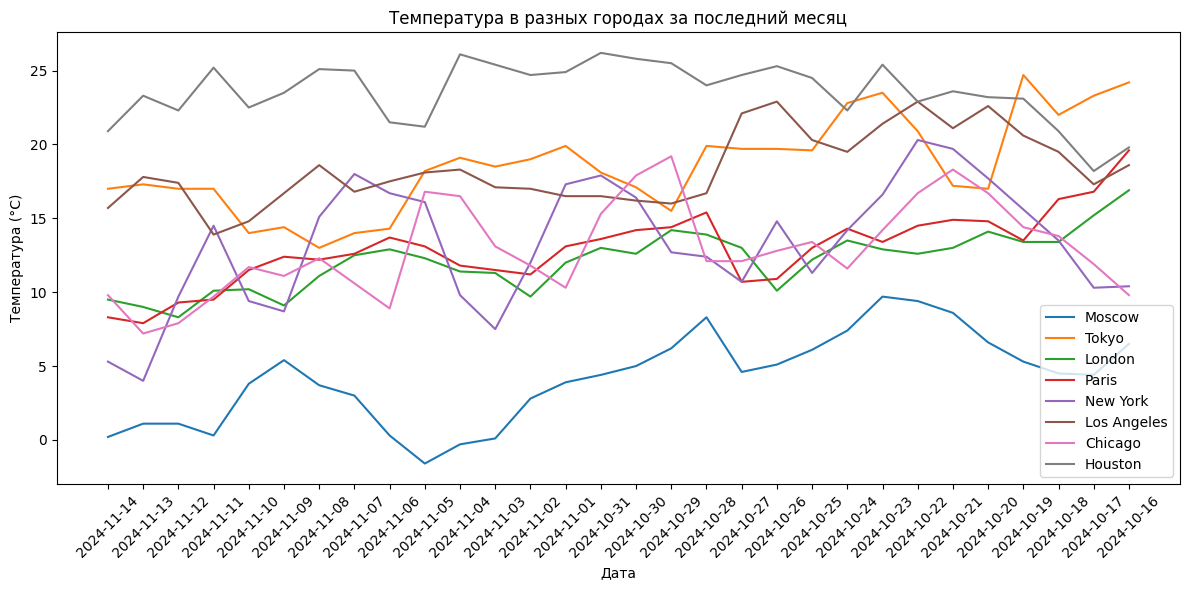

<Figure size 1200x600 with 0 Axes>

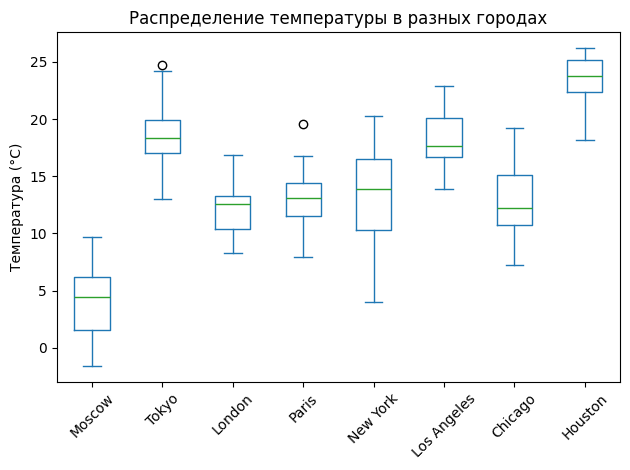

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Соберите данные о погоде для всех городов
city_temperatures = {}
start_date = datetime.now()

for city in cities:
    monthly_data = get_monthly_weather_data(city, start_date)
    city_temperatures[city] = monthly_data

# Преобразование данных в DataFrame для удобного анализа
df = pd.DataFrame(city_temperatures)

# Визуализация изменения температуры
plt.figure(figsize=(12, 6))
for city in df.columns:
    plt.plot(df.index, df[city], label=city)

plt.title('Температура в разных городах за последний месяц')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График распределения температуры
plt.figure(figsize=(12, 6))
df.plot(kind='box')
plt.title('Распределение температуры в разных городах')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
import requests
from datetime import datetime, timedelta
import pandas as pd  # Импортируем pandas для работы с DataFrame

# Список городов
cities = ["Moscow", "Tokyo", "London", "Paris", "New York", "Los Angeles", "Chicago", "Houston"]

# Функция для получения данных о погоде
def get_weather_data(city, date):
    api_key = "071839bb68634f109d3175553241411"  
    url = f"http://api.weatherapi.com/v1/history.json"
    
    # Форматирование даты
    date_str = date.strftime('%Y-%m-%d')
    
    # Формирование URL с параметрами
    url = f"{url}?key={api_key}&q={city}&dt={date_str}"
    
    # Отправка запроса
    response = requests.get(url)
    
    # Обработка ответа
    if response.status_code == 200:
        data = response.json()
        if 'forecast' in data and 'forecastday' in data['forecast']:
            temp = data["forecast"]["forecastday"][0]["day"]["avgtemp_c"]  # Получение средней температуры
            return temp
        else:
            print(f"Нет данных о погоде для {city} на {date_str}")
            return None
    else:
        print(f"Ошибка получения данных для {city} на {date_str}: {response.status_code} - {response.text}")
        return None

# Получение данных за месяц
def get_monthly_weather_data(city, start_date, days=30):
    temperatures = {}
    for i in range(days):
        date = start_date - timedelta(days=i)
        temp = get_weather_data(city, date)
        if temp is not None:
            temperatures[date.strftime('%Y-%m-%d')] = temp
    return temperatures

# Пример использования
if __name__ == "__main__":
    start_date = datetime.now()  # Текущая дата
    all_city_data = {}  # Словарь для хранения данных всех городов

    for city in cities:
        monthly_data = get_monthly_weather_data(city, start_date)
        all_city_data[city] = monthly_data
        print(f"Температуры для {city}: {monthly_data}")

    # Преобразование данных в DataFrame
    df = pd.DataFrame(all_city_data)

    # Сохранение DataFrame в CSV файл
    df.to_csv('weather_data.csv', index=True)  # index=True сохраняет индексы (даты) в CSV

    print("Данные успешно сохранены в файл weather_data.csv.")


Температуры для Moscow: {'2024-11-14': 0.2, '2024-11-13': 1.1, '2024-11-12': 1.1, '2024-11-11': 0.3, '2024-11-10': 3.8, '2024-11-09': 5.4, '2024-11-08': 3.7, '2024-11-07': 3.0, '2024-11-06': 0.3, '2024-11-05': -1.6, '2024-11-04': -0.3, '2024-11-03': 0.1, '2024-11-02': 2.8, '2024-11-01': 3.9, '2024-10-31': 4.4, '2024-10-30': 5.0, '2024-10-29': 6.2, '2024-10-28': 8.3, '2024-10-27': 4.6, '2024-10-26': 5.1, '2024-10-25': 6.1, '2024-10-24': 7.4, '2024-10-23': 9.7, '2024-10-22': 9.4, '2024-10-21': 8.6, '2024-10-20': 6.6, '2024-10-19': 5.3, '2024-10-18': 4.5, '2024-10-17': 4.4, '2024-10-16': 6.5}
Температуры для Tokyo: {'2024-11-14': 17.0, '2024-11-13': 17.3, '2024-11-12': 17.0, '2024-11-11': 17.0, '2024-11-10': 14.0, '2024-11-09': 14.4, '2024-11-08': 13.0, '2024-11-07': 14.0, '2024-11-06': 14.3, '2024-11-05': 18.2, '2024-11-04': 19.1, '2024-11-03': 18.5, '2024-11-02': 19.0, '2024-11-01': 19.9, '2024-10-31': 18.1, '2024-10-30': 17.1, '2024-10-29': 15.5, '2024-10-28': 19.9, '2024-10-27': 19.7,

In [7]:
df=pd.read_csv("weather_data.csv")

In [11]:
df.head()

,Unnamed: 0,Moscow,Tokyo,London,Paris,New York,Los Angeles,Chicago,Houston
0,2024-11-14,0.2,17.0,9.5,8.3,5.3,15.7,9.8,20.9
1,2024-11-13,1.1,17.3,9.0,7.9,4.0,17.8,7.2,23.3
2,2024-11-12,1.1,17.0,8.3,9.3,9.7,17.4,7.9,22.3
3,2024-11-11,0.3,17.0,10.1,9.5,14.5,13.9,9.7,25.2
4,2024-11-10,3.8,14.0,10.2,11.5,9.4,14.8,11.7,22.5
